# ANOVA- Analysis of variance

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset 
boat = sns.load_dataset('titanic')
boat.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='age'>

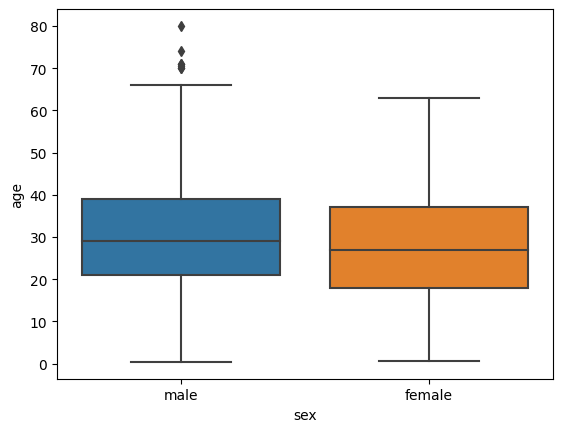

In [3]:
sns.boxplot(x='sex', y='age', data=boat) # comparison between 2 categorical variable for one continuous variable (t-test)

<Axes: xlabel='class', ylabel='age'>

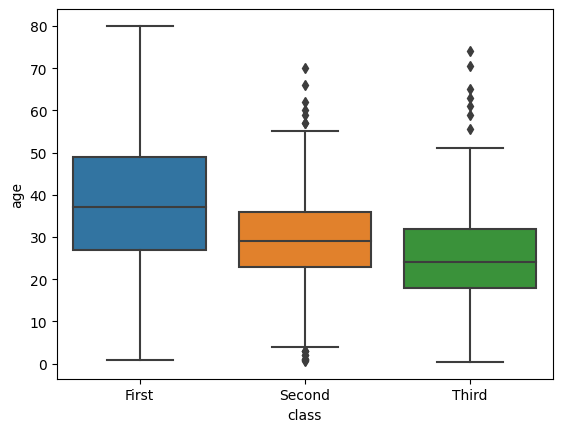

In [4]:
sns.boxplot(x='class', y='age', data=boat) # ANOVA BECAUSE MORE THAN 2 CATEGORIES ARE INCLUDED

In [6]:
# EXAMPLE

flower = sns.load_dataset('iris')
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
flower.sample(15)
flower.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
flower.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='sepal_length'>

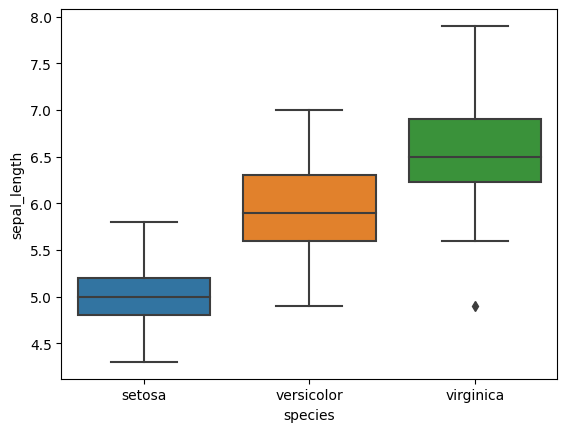

In [9]:
sns.boxplot(x='species', y= 'sepal_length', data=flower)

In [14]:
# stats package for analysis
# pip install statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
# one way ANOVA -we write numerical variables first then categorical variable

mod = ols('sepal_length ~ species', data = flower).fit()

aov_table = sm.stats.anova_lm(mod, type=2)
print(aov_table)

             df     sum_sq    mean_sq           F        PR(>F)
species     2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual  147.0  38.956200   0.265008         NaN           NaN


# Reason why we used Type=2 in above anova table 
This is useful when you have multiple predictors and you want to assess their individual contributions while controlling for the presence of other predictors in the model. It can provide a more balanced perspective of the predictors' effects without being influenced by the order in which they are added to the model.

In [17]:
# pairwise comparison
pair_t = mod.t_test_pairwise('species', method='bonferroni') #or sidak method can also be used
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-bonferroni,reject-bonferroni
versicolor-setosa,0.930,0.102958,9.032819,8.770194e-16,0.726531,1.133469,2.631058e-15,True
virginica-setosa,1.582,0.102958,15.365506,2.214821e-32,1.378531,1.785469,6.644464e-32,True
virginica-versicolor,0.652,0.102958,6.332686,2.765638e-09,0.448531,0.855469,8.296915e-09,True


In [20]:
# tukey hsd test
# pip install pingouin
import pingouin as pg
#first calculate ANOVA TABLE
aov = pg.anova(data=flower, dv='sepal_length', between='species', detailed=True)
print (aov)


    Source         SS   DF         MS           F         p-unc       np2
0  species  63.212133    2  31.606067  119.264502  1.669669e-31  0.618706
1   Within  38.956200  147   0.265008         NaN           NaN       NaN


In [22]:
#TUKEY HSD TEST
pt = pg.pairwise_tukey(data=flower, dv='sepal_length', between='species')
print(pt)

            A           B  mean(A)  mean(B)   diff        se          T   
0      setosa  versicolor    5.006    5.936 -0.930  0.102958  -9.032819  \
1      setosa   virginica    5.006    6.588 -1.582  0.102958 -15.365506   
2  versicolor   virginica    5.936    6.588 -0.652  0.102958  -6.332686   

        p-tukey    hedges  
0  2.420286e-14 -2.088053  
1  2.153833e-14 -3.053629  
2  8.287554e-09 -1.117195  


# Tukey's Honest Significant Difference (HSD) test 
using the pingouin library. This test is used to compare the means of different groups in a dataset and determine which groups are significantly different from each other.
The output provides pairs of species, their means, differences, and p-values. A small p-value suggests significant mean differences between species, while a larger p-value indicates no significant difference. This test helps identify which species' sepal lengths differ significantly.

# visualization of Tukey HSD test

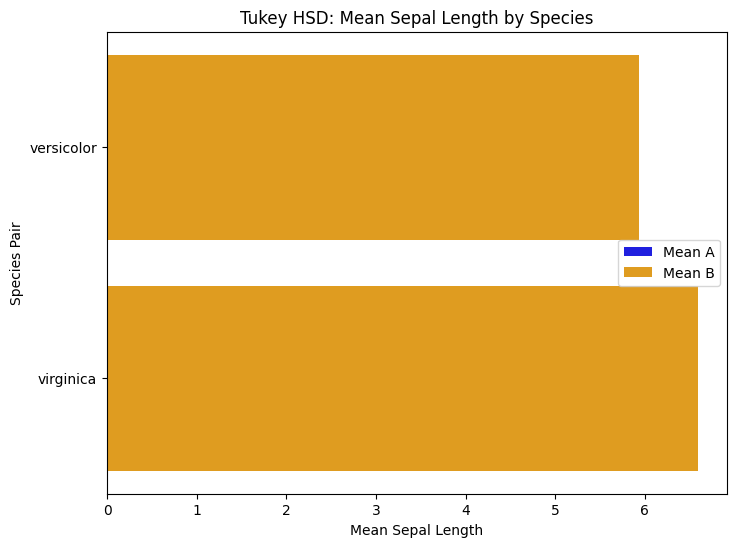

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

# Sample data and Tukey HSD test
flower = sns.load_dataset('iris')
pt = pg.pairwise_tukey(data=flower, dv='sepal_length', between='species')

# Create a Tukey HSD plot
plt.figure(figsize=(8, 6))
sns.barplot(x='mean(A)', y='A', data=pt, color='blue', label='Mean A')
sns.barplot(x='mean(B)', y='B', data=pt, color='orange', label='Mean B')

plt.xlabel('Mean Sepal Length')
plt.ylabel('Species Pair')
plt.title('Tukey HSD: Mean Sepal Length by Species')
plt.legend()

plt.show()

